<a href="https://colab.research.google.com/github/MakhtoutMohamed/k-means/blob/main/Atelier1_Kmeans_donnees_al%C3%A9atoires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [623]:
## Importer les packages nécessaires
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform

In [624]:
### Générer aléatoirement des données simulées de deux dimension
centres=4
X_train,true_lab=make_blobs(100,centers=centres,random_state=42)

In [625]:
print(X_train)

[[ -9.68512147   5.80867569]
 [ -6.06610997  -8.11097391]
 [ -2.97867201   9.55684617]
 [ -5.47683288  -8.28196066]
 [ -8.4805404    7.88430744]
 [ -7.87016352  -7.44640732]
 [  4.97114227   2.94871481]
 [  4.42020695   2.33028226]
 [  4.73695639   2.94181467]
 [ -3.6601912    9.38998415]
 [ -3.05358035   9.12520872]
 [ -6.65216726  -5.57296684]
 [ -6.35768563  -6.58312492]
 [  3.53354386   0.77696306]
 [ -1.77073104   9.18565441]
 [ -9.90922025   7.80599533]
 [ -8.56163696   8.15070616]
 [  4.56786871   2.97670258]
 [ -9.72218519   7.47724802]
 [ -8.36509013   7.250694  ]
 [ -2.97261532   8.54855637]
 [ -8.91542947   7.66467489]
 [ -9.28484271   8.17992171]
 [  5.00127444   3.51120625]
 [  4.6040528    3.53781334]
 [ -2.96983639  10.07140835]
 [  3.22450809   1.55252436]
 [ -8.21266041   6.46636536]
 [ -9.81300943   8.11060752]
 [ -8.1165779   -8.20056621]
 [ -7.55965191  -6.6478559 ]
 [  4.93599911   2.23422496]
 [ -7.07198816  -6.57856225]
 [ -7.67973218   6.5028406 ]
 [ -0.92998481

<Axes: >

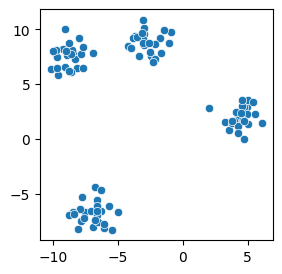

In [626]:
### Illustration graphique
plt.figure(figsize=[3,3])
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                #hue=true_lab,
                #style=true_lab,
                #palette="deep",
                legend=None
                )

In [627]:
### Definir la distance euclidienne
def euclid(centre,data):
    return np.sqrt(np.sum((centre-data)**2,axis=1))

In [628]:
def inertie_intra_classes(clusters, centres=None):
    n = sum(len(cl) for cl in clusters)
    if n == 0:
        return 0.0

    s = 0.0
    for k, cl in enumerate(clusters):
        if len(cl) == 0:
            continue
        cl = np.asarray(cl)
        c = np.asarray(centres[k]) if centres is not None else cl.mean(axis=0)
        s += np.sum((cl - c) ** 2)
    return s / n


def inertie_inter_classes(clusters, g, centres=None):
    n = sum(len(cl) for cl in clusters)
    if n == 0:
        return 0.0

    s = 0.0
    g = np.asarray(g)
    for k, cl in enumerate(clusters):
        nk = len(cl)
        if nk == 0:
            continue
        c = np.asarray(centres[k]) if centres is not None else np.mean(cl, axis=0)
        s += nk * np.sum((c - g) ** 2)
    return s / n

In [629]:
class Kmeans:
    def __init__(self, n_cl=20, Iter_max=100):
        self.n_cl = n_cl
        self.Iter_max = Iter_max

    def fit(self, X_train):
        min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        self.centres = [uniform(min_, max_) for _ in range(self.n_cl)]

        # centre de gravité global pour l'inter-classes
        g = np.mean(X_train, axis=0)

        self.history_intra = []
        self.history_inter = []

        itr = 0
        prec_centres = None

        while np.not_equal(self.centres, prec_centres).any() and itr <= self.Iter_max:
            # Affectation des points aux centres
            grp_points = [[] for _ in range(self.n_cl)]
            for x in X_train:
                dists = euclid(self.centres, x)
                idx = np.argmin(dists)
                grp_points[idx].append(x)

            prec_centres = self.centres

            self.centres = [np.mean(groupe, axis=0) for groupe in grp_points]

            for i, centre in enumerate(self.centres):
                if np.isnan(centre).any():
                    self.centres[i] = prec_centres[i]

            intra = inertie_intra_classes(grp_points, centres=self.centres)
            inter = inertie_inter_classes(grp_points, g=g, centres=self.centres)

            self.history_intra.append(intra)
            self.history_inter.append(inter)

            print(f"Iteration {itr:02d} | Inertie intra = {intra:.6f} | Inertie inter = {inter:.6f}")

            itr += 1

        return self.centres

    def evaluation(self, X):
        centres = []
        idxs = []
        for x in X:
            dists = euclid(self.centres, x)
            idx = np.argmin(dists)
            centres.append(self.centres[idx])
            idxs.append(idx)
        return centres, idxs

In [630]:
km = Kmeans(n_cl=4, Iter_max=10)
km.fit(X_train)

print("Dernière intra:", km.history_intra[-1])
print("Dernière inter:", km.history_inter[-1])

Iteration 00 | Inertie intra = 10.827181 | Inertie inter = 54.476852
Iteration 01 | Inertie intra = 6.313719 | Inertie inter = 58.990315
Iteration 02 | Inertie intra = 1.884080 | Inertie inter = 63.419953
Iteration 03 | Inertie intra = 1.696401 | Inertie inter = 63.607633
Iteration 04 | Inertie intra = 1.696401 | Inertie inter = 63.607633
Dernière intra: 1.6964008915092135
Dernière inter: 63.60763268682247


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [631]:
### Créer et entrainer le modèle Kmeans
km=Kmeans(n_cl=4)
centres=km.fit(X_train)
#print(len(centres[0]))

Iteration 00 | Inertie intra = 34.904794 | Inertie inter = 30.399239
Iteration 01 | Inertie intra = 10.368635 | Inertie inter = 54.935398
Iteration 02 | Inertie intra = 2.253244 | Inertie inter = 63.050790
Iteration 03 | Inertie intra = 1.696401 | Inertie inter = 63.607633
Iteration 04 | Inertie intra = 1.696401 | Inertie inter = 63.607633


In [632]:
###
class_centers, classification = km.evaluation(X_train)
print(len(class_centers))
#print(class_centers)
print([x for x, _ in km.centres])
print([y for _, y in km.centres])
print(classification)

100
[np.float64(4.444417646748971), np.float64(-2.698272507037713), np.float64(-8.854612195776115), np.float64(-6.9749469009335145)]
[np.float64(2.0212214813741207), np.float64(8.743419509848977), np.float64(7.548082423511621), np.float64(-6.764719664988015)]
[np.int64(2), np.int64(3), np.int64(1), np.int64(3), np.int64(2), np.int64(3), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(3), np.int64(3), np.int64(0), np.int64(1), np.int64(2), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(2), np.int64(2), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(2), np.int64(0), np.int64(3), np.int64(1), np.int64(1), np.int64(3), np.int64(3), np.int64(2), np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(3), np.int64(2), np.int64(2), np.int64(1)

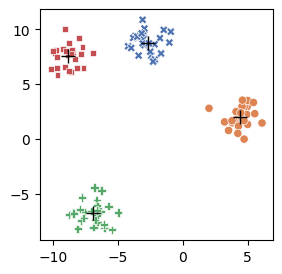

In [633]:
plt.figure(figsize=[3,3])
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_lab,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in km.centres],
         [y for _, y in km.centres],
         'k+',
         markersize=10,
         )
plt.show()

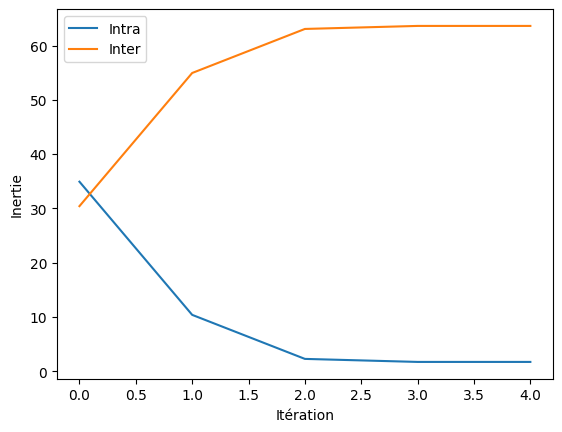

In [634]:
import matplotlib.pyplot as plt

plt.plot(km.history_intra, label="Intra")
plt.plot(km.history_inter, label="Inter")
plt.xlabel("Itération")
plt.ylabel("Inertie")
plt.legend()
plt.show()